# ADP 25회 실기 문제

[![Hits](https://hits.seeyoufarm.com/api/count/incr/badge.svg?url=https%3A%2F%2Fwww.datamanim.com%2Fdataset%2FADPpb%2F00%2F25.html&count_bg=%23582382&title_bg=%23555555&icon=&icon_color=%23E7E7E7&title=hits&edge_flat=false)](https://hits.seeyoufarm.com)

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

```{attention} 
**[캐글에 풀이공유하기](https://www.kaggle.com/datasets/kukuroo3/adp-p7/code)**   
```

```{admonition} 1번
**데이터 확인 및 전처리**     
- 1.1 EDA, 이상치 제거 후 F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성해서 그 결과값으로 탐색적 분석 실시
- 1.2 F, M feature 기반으로 군집분석 실시
- 1.3 군집 결과의 적합성을 군집 내 응집도, 군집 간 분리도의 개념을 사용해서 서술
- 1.4 적합된 군집 별 특성에 대한 의견과 비즈니스적 판단 제시
- 데이터 설명
    - InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.     
    - StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.     
    - Description: Product (item) name. Nominal.    
    - Quantity: The quantities of each product (item) per transaction. Numeric.     
    - InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.   
    - UnitPrice: Unit price. Numeric, Product price per unit in sterling.    
    - CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.     
    - Country: Country name. Nominal, the name of the country where each customer resides.   
- 출처
    - https://archive.ics.uci.edu/ml/index.phpm
```

In [154]:
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany


In [155]:
print(df.shape)
df.info()

(41024, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41024 entries, 0 to 41023
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    41024 non-null  object 
 1   StockCode    41024 non-null  object 
 2   Description  41024 non-null  object 
 3   Quantity     41024 non-null  int64  
 4   InvoiceDate  41024 non-null  object 
 5   UnitPrice    41024 non-null  float64
 6   CustomerID   41024 non-null  float64
 7   Country      41024 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ MB


### 1.1 EDA, 이상치 제거 후 F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성해서 그 결과값으로 탐색적 분석 실시

In [156]:
### 주문 수량이 -인 경우가 있음. 제거
print((df.Quantity < 0).sum())
df = df[df.Quantity >= 0]

1157


In [168]:
df.Country.value_counts()

Country
Germany            9042
France             8342
EIRE               7238
Spain              2485
Netherlands        2363
Belgium            2031
Switzerland        1842
Portugal           1462
Australia          1185
Norway             1072
Italy               758
Channel Islands     748
Finland             685
Cyprus              614
Name: count, dtype: int64

<Axes: >

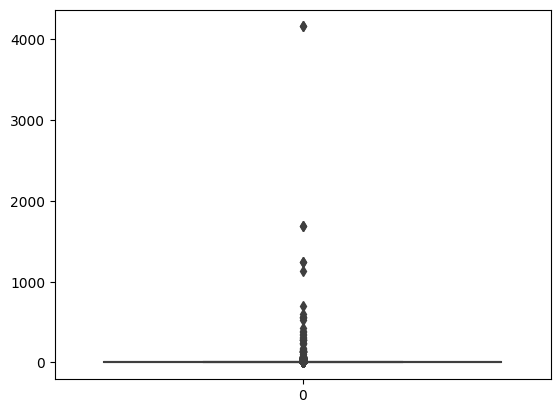

In [163]:
sns.boxplot(df.UnitPrice)

In [235]:
print('<답안>')
print('원본 데이터의 총 개수는 41,024개로, 변수는 8개이며, NA는 존재하지 않는다.')
print('InvoiceNo, StockCode, Description, InvoiceDate 변수는 각 주문에 대한 정보를 담고 있는 값이어서 별도 EDA를 진행하지 않았다.')
print('Country는 범주형 변수로, 일부 카테고리에 편중되는 현상이 있다.')
print('Quantity는 주문 수량 변수인데, 음수인 경우 이상한 값으로 볼 수 있다. 이 경우를 제거하였다.')
print('Unitprice에는 이상치가 존재한다. 이상치 그 자체로 가격의 의미를 담고 있기 때문에 제거하지는 않고, 변수를 사용할 경우 변환을 통해 이상치의 영향력을 감소시켜야 한다.')

<답안>
원본 데이터의 총 개수는 41,024개로, 변수는 8개이며, NA는 존재하지 않는다.
InvoiceNo, StockCode, Description, InvoiceDate 변수는 각 주문에 대한 정보를 담고 있는 값이어서 별도 EDA를 진행하지 않았다.
Country는 범주형 변수로, 일부 카테고리에 편중되는 현상이 있다.
Quantity는 주문 수량 변수인데, 음수인 경우 이상한 값으로 볼 수 있다. 이 경우를 제거하였다.
Unitprice에는 이상치가 존재한다. 이상치 그 자체로 가격의 의미를 담고 있기 때문에 제거하지는 않고, 변수를 사용할 경우 변환을 통해 이상치의 영향력을 감소시켜야 한다.


In [236]:
df['CustomerID'] = df['CustomerID'].astype(int)
invoice_by_id = df.groupby('CustomerID').count()['InvoiceNo']

df['F'] = df['CustomerID'].apply(lambda x:invoice_by_id[x])
total_price = df['Quantity'] * df['UnitPrice']

df['total_price'] = df['Quantity'] * df['UnitPrice']
invoice_by_total = df.groupby('CustomerID').sum()['total_price']

df['M'] = df['CustomerID'].apply(lambda x:invoice_by_total[x])
df.drop('total_price', axis=1, inplace=True)

print('먼저, CustomerID의 변수 형식을 integer로 조정한다. 그 다음, CustomerID별 Invoice count를 계산하고, 이를 F 변수에 적용한다.')
print('다음으로 Quantity와 UnitPrice를 곱해 total_price 변수를 만들고, CustomerID 별 Invoice total price의 sum을 계산한다. 그리고 이를 M변수에 적용한다.')

먼저, CustomerID의 변수 형식을 integer로 조정한다. 그 다음, CustomerID별 Invoice count를 계산하고, 이를 F 변수에 적용한다.
다음으로 Quantity와 UnitPrice를 곱해 total_price 변수를 만들고, CustomerID 별 Invoice total price의 sum을 계산한다. 그리고 이를 M변수에 적용한다.


## 1.2 F, M feature 기반으로 군집분석 실시 

두 변수 모두 이상치가 보이고 있고, skew가 심한 형태이므로 로그 변환을 진행한 다음 군집 분석을 수행한다.


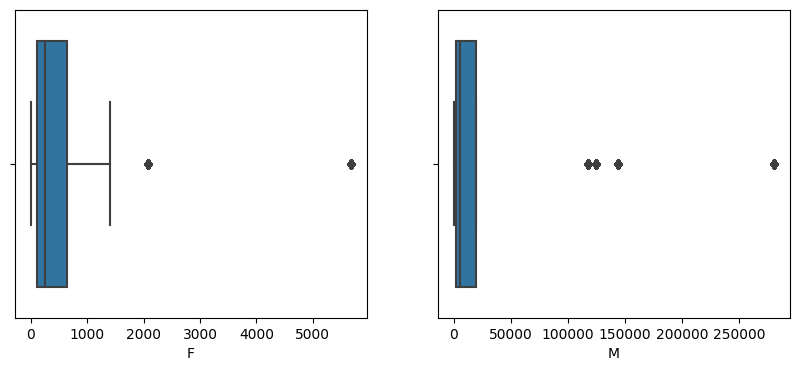

In [237]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x='F', data=df, ax=axes[0])
sns.boxplot(x='M', data=df, ax=axes[1])

print('두 변수 모두 이상치가 보이고 있고, skew가 심한 형태이므로 로그 변환을 진행한 다음 군집 분석을 수행한다.')

<Axes: xlabel='M_log'>

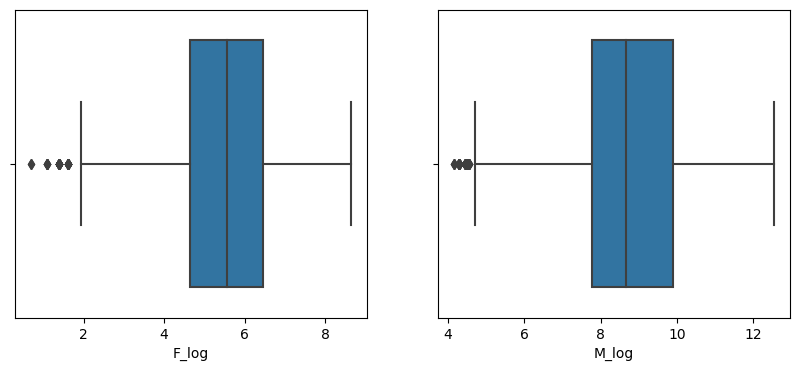

In [238]:
df_for_cluster = pd.DataFrame()

df_for_cluster['F_log'] = np.log(df['F'])
df_for_cluster['M_log'] = np.log(df['M'])

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x='F_log', data=df_for_cluster, ax=axes[0])
sns.boxplot(x='M_log', data=df_for_cluster, ax=axes[1])

In [219]:
print('다음으로 Data scaling을 진행한다. 로그 변환 이후 skew는 완화되었으나, 왼쪽 꼬리에 이상치가 탐지되고 있으므로, 이상치에 강한 RobustScaler를 사용하였다.')

Data scaling을 진행한다. 로그 변환 이후 skew는 완화되었으나, 왼쪽 꼬리에 이상치가 탐지되고 있으므로, 이상치에 강한 RobustScaler를 사용하였다.


In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

scaler = RobustScaler()
scaled = scaler.fit_transform(df_for_cluster)

### elbow plot
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(scaled) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

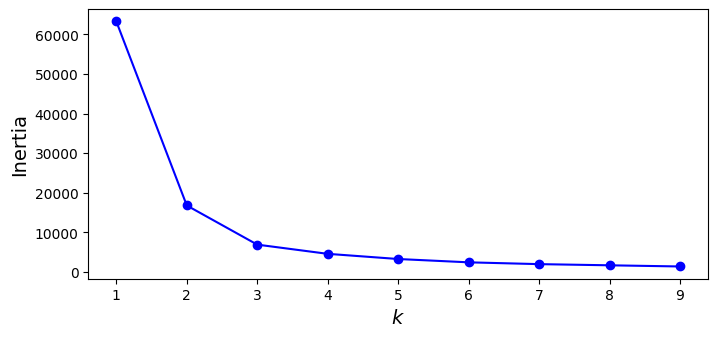

최적의 군집 수를 결정하기 위해 elbow plot을 도출하였고, elbow는 2이므로 군집 개수는 2로 결정하였다.


In [224]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

print('최적의 군집 수를 결정하기 위해 elbow plot을 도출하였고, elbow는 2이므로 군집 개수는 2로 결정하였다.')

/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


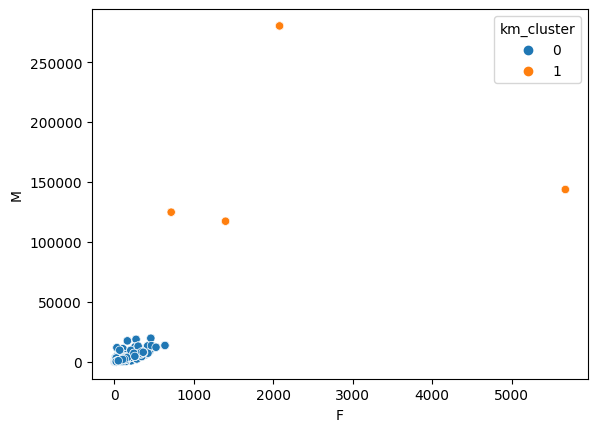

군집화 결과를 시각화하면 위와 같다.


In [234]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled)

# 할당된 군집을 iris 데이터에 추가
new_labels = kmeans.labels_
df['km_cluster'] = new_labels

sns.scatterplot(x='F', y='M', hue='km_cluster', data=df)
plt.show()
print('군집화 결과를 시각화하면 위와 같다.')

## 1.3 군집 결과의 적합성을 군집 내 응집도, 군집 간 분리도의 개념을 사용해서 서술

In [ ]:
print('<답안>')
print('F와 M 변수에 로그를 취한 다음, 군집 분석 결과를 시각화하면, 두 개의 군집이 명확하게 보임을 알 수 있다. 군집 간 분리도는 매우 높은 형태이며, 이는 군집이 잘 나누어졌음을 시사한다.')
print('왼쪽 아래의 주황색 군집의 경우 응집도가 좋으나, 오른쪽 위에 파란색으로 보이는 군집의 경우 군집 내 응집도가 높아 보이지 않는다.')

## 1.4 적합된 군집 별 특성에 대한 의견과 비즈니스적 판단 제시

In [232]:
print('<답안>')
print('구매 빈도와 구매액으로 소비자들을 분류해 봤을 때, 구매 빈도와 금액이 높지 않은 다수의 소비자와 구매 빈도와 금액이 매우 높은 4명의 소비자로 군집이 나뉘었다.')
print('왼쪽 아래의 군집 응집도가 매우 좋기 때문에, 오른쪽 위의 파란색 군집에 포함된 4명은 이상치로 취급된다. 이 경우 이상치는 회사에 매우 큰 이득을 가져다 주므로, 특별한 서비스를 제공하여 소비자가 이탈하지 않도록 잘 관리하고, 구매 혜택 또한 더 신경쓸 필요가 있다.')

<답안>
구매 빈도와 구매액으로 소비자들을 분류해 봤을 때, 구매 빈도와 금액이 높지 않은 다수의 소비자와 구매 빈도와 금액이 매우 높은 4명의 소비자로 군집이 나뉘었다.
왼쪽 아래의 군집 응집도가 매우 좋기 때문에, 오른쪽 위의 파란색 군집에 포함된 4명은 이상치로 취급된다. 이 경우 이상치는 회사에 매우 큰 이득을 가져다 주므로, 특별한 서비스를 제공하여 소비자가 이탈하지 않도록 잘 관리하고, 구매 혜택 또한 더 신경쓸 필요가 있다.


```{admonition} 2번
**시계열분석**     
- 2.1 EDA와 시각화를 진행하라
- 2.2 결측치 처리와 해당 결측치 처리 방식에 대한 논리적 근거를 제시하라
- 2.3 계절성을 반영한 시계열 모델을 제시하고 정확도 측면에서 모델 성능 평가 할 것
- 2.4 분석 결과 활용 가능 여부에 대한 분석 전문가로서의 제안

```

In [4]:
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem2.csv',index_col = 0)
df.head()

,counts
0,544.3
1,603.1
2,NaN
3,533.4
4,619.5


## 2.1 EDA와 시각화를 진행하라 

<답안>
이 데이터는 시계열 데이터로 판단되며, 특정 시간에 대한 빈도 데이터를 담고 있다. 또한, 일부 데이터에는 NA 값이 존재한다.


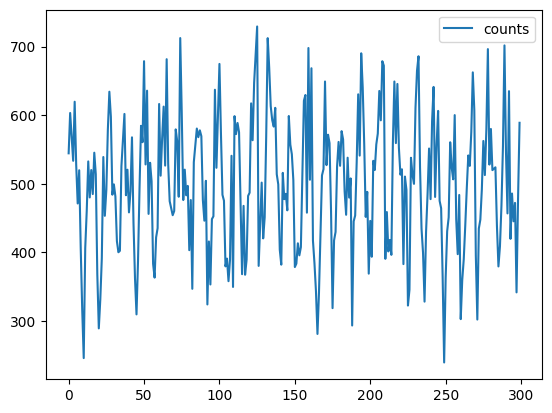

데이터의 변화를 시각화해 봤을 땐, 별다른 패턴을 발견하기 어려웠다.


In [5]:
print('<답안>')
print('이 데이터는 시계열 데이터로 판단되며, 특정 시간에 대한 빈도 데이터를 담고 있다. 또한, 일부 데이터에는 NA 값이 존재한다.')
sns.lineplot(df)
plt.show()
print('데이터의 변화를 시각화해 봤을 땐, 별다른 패턴을 발견하기 어려웠다.')

## 2.2 결측치 처리와 해당 결측치 처리 방식에 대한 논리적 근거를 제시하라 

In [6]:
print('<답안>')
print('결측치 처리 전, 데이터의 index를 임의의 시간 데이터로 변환한다.\n')
index = pd.date_range('8/17/2023', periods=len(df), freq='D')
df.index = index
df.info()

<답안>
결측치 처리 전, 데이터의 index를 임의의 시간 데이터로 변환한다.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2023-08-17 to 2024-06-11
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   counts  295 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [7]:
df = df.interpolate(method='values') # 값 기준 선형 보간
df.info()
print('\n결측치 처리는 시계열 데이터의 앞 뒤 변수를 확인하여 시간에 따라 변하는 값을 잘 표현하여 보정하는 보간법을 사용하였다. 또한, 시간 index는 임의로 넣은 것이기 때문에 값을 기준으로 보간하였다.')
print('처리 전후로, NA 값 5개가 없어진 것을 확인할 수 있다.')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2023-08-17 to 2024-06-11
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   counts  300 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB

결측치 처리는 시계열 데이터의 앞 뒤 변수를 확인하여 시간에 따라 변하는 값을 잘 표현하여 보정하는 보간법을 사용하였다. 또한, 시간 index는 임의로 넣은 것이기 때문에 값을 기준으로 보간하였다.
처리 전후로, NA 값 5개가 없어진 것을 확인할 수 있다.


## 2.3 계절성을 반영한 시계열 모델을 제시하고 정확도 측면에서 모델 성능 평가 할 것 

In [8]:
print('<답안>')
print('SARIMA(Seasonal ARIMA)는 계절성이 반영되는 시계열 모델이며, 이를 적용하여 모델링 진행한다.')
print('먼저, 데이터를 train과 test 데이터로 분리한다. 시간에 따라 변하는 데이터이므로, 시간에 따라 분할한다. 2024년 4월까지의 데이터를 train으로, 2024년 5월부터의 데이터를 test 데이터로 사용했으며, 각 데이터의 개수는 258개, 42개이다.')

train = df[df.index <= '2024-04-30']
test = df[df.index > '2024-04-30']

<답안>
SARIMA(Seasonal ARIMA)는 계절성이 반영되는 시계열 모델이며, 이를 적용하여 모델링 진행한다.
먼저, 데이터를 train과 test 데이터로 분리한다. 시간에 따라 변하는 데이터이므로, 시간에 따라 분할한다. 2024년 4월까지의 데이터를 train으로, 2024년 5월부터의 데이터를 test 데이터로 사용했으며, 각 데이터의 개수는 258개, 42개이다.


In [1]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
adfuller(train['counts'])
print('Adfuller test 결과, p-value 0.02로 유의수준 하에서 귀무가설을 기각한다. 따라서, 이 데이터는 정상성을 가지고 있다고 볼 수 있으며, 차분 파리미터는 설정하지 않는다.')

(-3.2380091666915165,
 0.01788731782096352,
 15,
 242,
 {'1%': -3.457664132155201,
  '5%': -2.8735585105960224,
  '10%': -2.5731749894132916},
 2758.6100859488947)

In [ ]:
from pmdarima import auto_arima

auto_model = auto_arima(train, start_p=0, d=0, start_q=0,
                        max_p=3, max_q=3, 
                        start_P=0, start_Q=0,
                        max_P=3, max_Q=3, m=12,
                        seasonal=True, information_criterion='aic',
                        trace=True)

## 2.4 분석 결과 활용 가능 여부에 대한 분석 전문가로서의 제안 

```{admonition} 3번
**통계문제**     
```

```{admonition} 3-1번
**서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?**
```

In [3]:
print('<답안>')
print('속도의 평균은 변화량의 평균으로 볼 수 있고, 이는 조화평균으로 계산할 수 있다.')
print(f'서울에서 영동까지 해당 속도로 왕복했을 때의 평균 속도는 {round(stats.hmean([100, 80]), 3)} 이다.')

<답안>
속도의 평균은 변화량의 평균으로 볼 수 있고, 이는 조화평균으로 계산할 수 있다.
서울에서 영동까지 해당 속도로 왕복했을 때의 평균 속도는 88.889 이다.


```{admonition} 3-2번
**연매출이 3000, 4000, 5000이었다면 연평균 몇배가 증가한 것인가?**
```

In [17]:
print('<답안>')
print('비율의 평균은 곱셉으로 계산할 수 있으므로 기하평균으로 계산할 수 있다.')
print(f'따라서 연매출의 증가율 평균은 {round(stats.gmean([3000/4000, 4000/5000]), 3) + 1}배이다.')

<답안>
비율의 평균은 곱셉으로 계산할 수 있으므로 기하평균으로 계산할 수 있다.
따라서 연매출의 증가율 평균은 1.775배이다.


```{admonition} 3-3번
**남성, 여성의 등산, 수영에 대한 취미 선호도 빈도표(2x2)를 보고, 남성 중에서 등산을 좋아할 확률을 구하시오**
```

![image](https://github.com/Datamanim/datarepo/blob/main/adp/25/problem3_3.png?raw=true)

In [24]:
print('<답안>')
print(f'P(남성)={(20 + 10)/(20 + 10 + 15 + 30)}')
print(f'P(남성|등산)={round(20/(20+15), 3)}')
print(f'P(여성|등산)={round(15/(20+15), 3)}')

print(f'P(등산|남성)=P(남성|등산)*P(등산)/(P(남성|등산)*P(등산)+P(여성|등산)*P(등산))={round((0.571*0.4)/((0.571*0.4) + (0.429*0.6)), 3)}')
print('남성 중 등산을 좋아할 확률은 약 0.47이다.')

<답안>
P(남성)=0.4
P(남성|등산)=0.571
P(여성|등산)=0.429
P(등산|남성)=P(남성|등산)*P(등산)/(P(남성|등산)*P(등산)+P(여성|등산)*P(등산))=0.47
남성 중 등산을 좋아할 확률은 약 0.47이다.


```{admonition} 3-4번
**표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정**
```

In [25]:
n = 10
var = 90
alpha = 0.05

interval = ((n - 1) * var)/stats.chi2.ppf(1-(alpha/2), df=n-1), ((n - 1) * var)/stats.chi2.ppf(alpha/2, df=n-1)

In [27]:
print('<답안>')
print(f'모분산의 95% 신뢰구간은 {interval} 이다.')

<답안>
모분산의 95% 신뢰구간은 (42.58055444790953, 299.95672846672363) 이다.


```{admonition} 4번
**4번 임상 대상 20명에 대해 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9  신뢰구간 95%, 차이가 존재하는지 확인하려한다**     
- 4.1 귀무가설과 연구가설을 제시하시오
- 4.2 검정 후 귀무가설 기각 여부 제시

```

In [6]:
n = 20
d = 24
d_std = 9
alpha = 0.05

In [126]:
print('<답안>')
print('H0: 혈압약 투여 이전과 이후의 혈압은 차이가 없다. (D=0)')
print('H1: 혈압약 투여 이전과 이후의 혈압은 차이가 있다. 즉, 혈압이 떨어진다. (D>0)')
print('D=0 대 D>0을 검정하는 문제이므로, 단측 검정을 수행한다.')
print('')
print(f'검정통계량: {24/(9/np.sqrt(n))}, 기각역은 {stats.t.ppf(0.95, n-1)}이다. 따라서 귀무가설을 기각할 충분한 통계적 근거가 있다.')
print('따라서, 혈압약 투여 후, 혈압이 떨어진다고 생각할 수 있다.')
print('하지만 데이터의 요약 정보만 제시되어 있어 모집단 분포를 검정할 방법이 없고, Rank를 구할 수 없기에 비모수 검정을 진행할 수 없다. 우선 모집단 분포의 정규성을 가정하고 주어진 요약 정보를 가지고 Paired T-test를 진행하였으나, 모집단 분포의 모양에 따라 검정 결과의 신뢰도가 저하할 우려가 있다.')

<답안>
H0: 혈압약 투여 이전과 이후의 혈압은 차이가 없다. (D=0)
H1: 혈압약 투여 이전과 이후의 혈압은 차이가 있다. 즉, 혈압이 떨어진다. (D>0)
D=0 대 D>0을 검정하는 문제이므로, 단측 검정을 수행한다.

검정통계량: 8.432740427115679, 기각역은 1.8331129326536335이다. 따라서 귀무가설을 기각할 충분한 통계적 근거가 있다.
따라서, 혈압약 투여 후, 혈압이 떨어진다고 생각할 수 있다.
하지만 데이터의 요약 정보만 제시되어 있어 모집단 분포를 검정할 방법이 없고, Rank를 구할 수 없기에 비모수 검정을 진행할 수 없다. 우선 모집단 분포의 정규성을 가정하고 주어진 요약 정보를 가지고 Paired T-test를 진행하였으나, 모집단 분포의 모양에 따라 검정 결과의 신뢰도가 저하할 우려가 있다.


```{admonition} 5번
**공장 X,Y,Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다**     
- 5.1 귀무가설과 연구가설을 제시하시오
- 5.2 검정 후 귀무가설 기각 여부 제시

```

In [40]:
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem5.csv',encoding='cp949')
df.head()

,출하 소요시간,공장명,공장별 출하 소요시간 순위
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1


In [47]:
print('<답안>')
print('가설 제시')
print('H0: 공장 별 출하 소요시간의 중앙값은 차이가 없다.')
print('H1: 공장 별 출하 소요시간의 중앙값은 차이가 있다.')

<답안>
가설 제시
H0: 공장 별 출하 소요시간의 중앙값은 차이가 없다.
H1: 공장 별 출하 소요시간의 중앙값은 차이가 있다.


In [44]:
x = df[df['공장명']=='X']['출하 소요시간']
y = df[df['공장명']=='Y']['출하 소요시간']
z = df[df['공장명']=='Z']['출하 소요시간']

In [57]:
print('<답안>')
print('median의 차이 여부를 보는 Mood의 median test를 진행한다.')
print(f'검정 결과, 카이제곱 검정통계량 {stats.median_test(x, y, z)[0]}, p-value {stats.median_test(x, y, z)[1]}로 귀무가설을 기각하지 않는다.')
print('따라서, 공장 별 출하 소요시간의 중앙값에는 차이가 있다고 볼 통계적 근거가 없다.')

<답안>
median의 차이 여부를 보는 Mood의 median test를 진행한다.
검정 결과, 카이제곱 검정통계량 1.2, p-value 0.5488116360940265로 귀무가설을 기각하지 않는다.
따라서, 공장 별 출하 소요시간의 중앙값에는 차이가 있다고 볼 통계적 근거가 없다.


```{admonition} 6번
** 투자금을 1년 차 50억원, 2년 차 60억원, 3 년 치 80억으로 결정했다면, NPV(순현재가치)가 가장 높아지는 안을 제시하시오**     

```

![image](https://github.com/Datamanim/datarepo/blob/main/adp/25/problem6.png?raw=true)

|투자안|1년차|2년차|3년차|NPV|
|---|------|---|---|---|
|1안|23|23|15|30|
|2안|15|15|12|20|
|3안|17|25|12|31|
|4안|16|12|13|42|
|5안|24|23|17|44|

In [124]:
plan_1 = [23, 23, 15, 30]
plan_2 = [15, 15, 12, 20]
plan_3 = [17, 25, 12, 31]
plan_4 = [16, 12, 13, 42]
plan_5 = [24, 23, 17, 44]

from itertools import combinations_with_replacement

sets = ['1', '2', '3', '4', '5']
data = combinations_with_replacement(sets, 3)

npvs = dict()
for item in data:
    npv_list = list()
    
    first, second, third = item
    if int(first)==1:
        npv_list.append(plan_1)
    elif int(first)==2:
        npv_list.append(plan_2)
    elif int(first)==3:
        npv_list.append(plan_3)
    elif int(first)==4:
        npv_list.append(plan_4)
    elif int(first)==5:
        npv_list.append(plan_5)
        
    if int(second)==1:
        npv_list.append(plan_1)
    elif int(second)==2:
        npv_list.append(plan_2)
    elif int(second)==3:
        npv_list.append(plan_3)
    elif int(second)==4:
        npv_list.append(plan_4)
    elif int(second)==5:
        npv_list.append(plan_5)
        
    if int(third)==1:
        npv_list.append(plan_1)
    elif int(third)==2:
        npv_list.append(plan_2)
    elif int(third)==3:
        npv_list.append(plan_3)
    elif int(third)==4:
        npv_list.append(plan_4)
    elif int(third)==5:
        npv_list.append(plan_5)

    first_cost = 0
    second_cost = 0
    third_cost = 0
    npv = 0
    for i in range(3):
        first_cost += npv_list[i][0] # 1년차 cost
        second_cost += npv_list[i][1] # 2년차 cost
        third_cost += npv_list[i][2] # 3년차 cost
        npv += npv_list[i][3]

    npvs[(first, second, third)] = [first_cost, second_cost, third_cost, npv]
print('<답안>')
print('1년 차의 예산을 볼 때, 최대 3개의 안을 복원추출 형태로 선택 가능하다. 3개를 중복조합으로 선택하고, 예산을 넘어가는 안을 제외한 후보를 먼저 선정하였다.')
print('')
for k, v in npvs.items():
    if v[0] > 50 or v[1] > 60 or v[2]> 80:
        continue
    print(k, v)

print('')
print('이 중 가장 NPV가 높은 안은 4안을 3번 선택하는 안으로, NPV는 126이다.')

<답안>
1년 차의 예산을 볼 때, 최대 3개의 안을 복원추출 형태로 선택 가능하다. 3개를 중복조합으로 선택하고, 예산을 넘어가는 안을 제외한 후보를 먼저 선정하였다.

('2', '2', '2') [45, 45, 36, 60]
('2', '2', '3') [47, 55, 36, 71]
('2', '2', '4') [46, 42, 37, 82]
('2', '3', '4') [48, 52, 37, 93]
('2', '4', '4') [47, 39, 38, 104]
('3', '4', '4') [49, 49, 38, 115]
('4', '4', '4') [48, 36, 39, 126]

이 중 가장 NPV가 높은 안은 4안을 3번 선택하는 안으로, NPV는 126이다.
